In [1]:
# Importing python packages

# Data manipulation packages
import numpy as np
import pandas as pd

# Data Extraction 
import wget

# Data Visualization Pactages
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizer code
%matplotlib inline 

In [2]:
# downloading dataset using wget
# url = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv"

# response = wget.download(url, "housing_price.csv")

In [3]:
# load dataset 
house = pd.read_csv('data/housing_price.csv')

house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# Dropping ocean_proximity column. 
del house['ocean_proximity']

# checking columns
house.columns


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

<Figure size 1500x500 with 0 Axes>

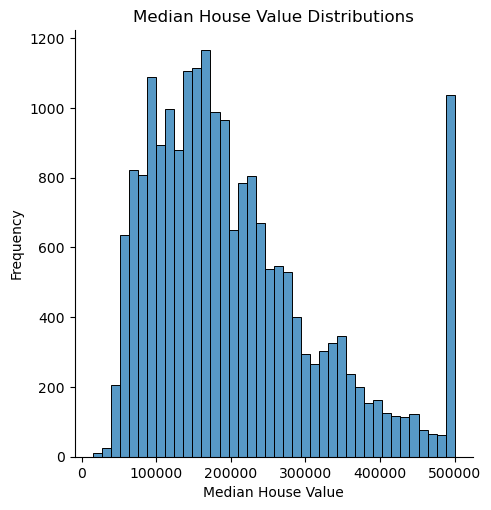

In [5]:
# Plotting the distribution of msrp.

# Plot size. 
plt.figure(figsize = (15,5))

# Setting bin size.
# bins = 10 ** np.arange(3.2, 6.0 + 0.08, 0.08)

# Plotting Bar Chart with seaborn. 
sns.displot(house['median_house_value'], bins = 40)


# Plot Annotations 
plt.title('Median House Value Distributions')
plt.xlabel("Median House Value")
plt.ylabel("Frequency");

In [6]:
house.shape

(20640, 9)

> The target value as a long tail.

In [7]:
# Finding null value in the data. 
house.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [8]:
# Statistic variable of the data. 
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# Setting the proportion for each 
# our three dataset.

# Total number of records. 
n = len(house)

# Proportion for Slitting 
n_training = int(n * 0.6)
n_val = int(n * 0.2)
n_testing = int(n * 0.2)

# Checktng the proportions and total record.
n, n_training + n_val + n_testing

(20640, 20640)

In [10]:
# Setting up random seed and reshuffling data.

# Extracting total number of index. 
idx = np.arange(len(house))

# Setting up random seed value.
np.random.seed(42)

# Reshuffling dataset index. 
np.random.shuffle(idx)

# Checking index values
idx[:10]

array([20046,  3024, 15663, 20484,  9814, 13311,  7113,  7668, 18246,
        5723])

In [31]:
# Dividing the dataset using iloc
house_training = house.iloc[idx[:n_training]].reset_index(drop = True)
house_val = house.iloc[idx[n_training : n_val + n_training]].reset_index(drop = True)
house_testing = house.iloc[idx[n_val + n_training:]].reset_index(drop = True)

# Checking each dataset. 
print(house_training.shape)
print(house_val.shape)
print(house_testing.shape)

(12384, 9)
(4128, 9)
(4128, 9)


In [32]:
# Extracting tarket Variables. 
y_training = np.log1p(house_training.median_house_value)
y_val = np.log1p(house_val.median_house_value)
y_testing = np.log1p(house_testing.median_house_value)

# Deleting y column from dataset.
del house_training['median_house_value']
del house_val['median_house_value']
del house_testing['median_house_value']

In [33]:
# Checking the y values 
y_training

0        10.772708
1        10.732061
2        13.122367
3        12.295003
4        12.535380
           ...    
12379    13.041806
12380    12.234665
12381    11.896833
12382    11.930326
12383    12.948726
Name: median_house_value, Length: 12384, dtype: float64

In [34]:
# Checking for track varible in dataset. 
print(house_training.columns,'\n\n')
print(house_val.columns,'\n\n')
print(house_testing.columns,'\n\n')

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object') 


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object') 


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object') 




In [35]:
# Filling null value with mean

# Finding null value in the data. 
house_training.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [36]:
# Divid the with o and mean fill null value.
house_training_0 = house_training.copy()

# Checking if the mean have changed. 
house_training_0.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

In [37]:
# Mean value missing value.
house_training.total_bedrooms.mean()

533.4803317730147

In [38]:
# Checking frequency 
house_training.total_bedrooms.value_counts()

328.0     38
343.0     36
345.0     34
280.0     33
314.0     33
          ..
1358.0     1
870.0      1
1352.0     1
1382.0     1
1415.0     1
Name: total_bedrooms, Length: 1681, dtype: int64

In [39]:
house_training

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250
...,...,...,...,...,...,...,...,...
12379,-117.81,33.88,19.0,2265.0,283.0,904.0,279.0,9.2327
12380,-120.68,35.48,15.0,2608.0,525.0,1351.0,502.0,2.7798
12381,-120.91,38.98,13.0,7689.0,1415.0,3264.0,1198.0,3.6530
12382,-117.72,34.09,36.0,1473.0,328.0,785.0,299.0,3.2566


In [40]:
# filling null with mean
house_training['total_bedrooms'] = house_training['total_bedrooms'].fillna(533)

In [41]:
# filling nul value with 0. 
house_training_0['total_bedrooms'] = house_training_0['total_bedrooms'].fillna(0)

In [42]:
# checking for null values. 
print(house_training.isna().sum(), '\n\n')

print(house_training_0.isna().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64 


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


## Train a model. 

In [43]:
# Model function.

def training_linear_regression(x, y):
    n = x.shape[0]
    ones = np.ones(n)
    x = np.column_stack([ones, x])
    
    xt = x.T
    xtx = xt.dot(x)
    xtx_inv = np.linalg.inv(xtx)
    
    w = xtx_inv.dot(xt)
    w = w.dot(y)
    
    return w[0], w[1:]

In [45]:
# Finding w0 and w for mean. 

w0, w = training_linear_regression(house_training, y_training)

w0, w

(-11.759577314981538,
 array([-2.76809520e-01, -2.82182042e-01,  2.93034361e-03, -1.48544662e-05,
         2.48048682e-04, -2.03763332e-04,  4.87010174e-04,  1.73086572e-01]))

In [48]:
# Finding wi0 and wi for 0 filled mean.
wi0, wi = training_linear_regression(house_training_0, y_training)

wi0, wi

(-11.686975241970226,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [53]:
# Validating the model using the validation 
# dataset.


# Predicting y with validation data
y_pred_1 = w0 + house_val.dot(w)

# Show result.
y_pred_1

array([11.46338435, 12.0591399 , 12.65418364, ..., 11.68135435,
       12.1740501 , 12.2402635 ])

In [55]:
# Validating the model using the validation 
# dataset.

# Predicting y with validation data
y_pred_2 = wi0 + house_val.dot(wi)

# Show result.
y_pred_2

array([11.46879627, 12.05823471, 12.65529319, ..., 11.68291953,
       12.17882297, 12.23588954])

In [50]:
# rmse function.
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [56]:
# Checking the rmse for fill mean and 0 

# fill mean 
rmse_1 = rmse(y_val, y_pred_1)

# fill 0 
rmse_2 = rmse(y_val, y_pred_2)

In [ ]:
# Checkin the values of rmse 1 and w 
print(rmse_1.r)